# Clustering
A supervised algorithm is an algorithm that depends on historical data to give an answer based on known data. The supervised algorithms use this known value from the past to train the model to train its data and build a model that is capable of predicting a value of a Data set variable in the future, on the other hand, an unsupervised algorithm has the luxury of dispensing with restrictions; instead, all dataset variables are used as predictors to build a model without the need for prior data. It categorizes the entries of the data set into clusters, into groups, into segments, where the entries that belong to the same cluster are similar to each other, have some characteristics in common or can be defined in some way from those outside the cluster. That is, between clusters we have elements that are the same, different clustering does not have to be similar, then the properties of said cluster are identified and treated separately, so that, once one has the clusters defined one can define the properties inherent characteristics that characterize each of them and define a separate plan or strategy for each cluster (used to carry out strategies or plan marketing campaigns)

# Distances

In [212]:
from scipy.spatial import distance_matrix
import pandas as pd

In [245]:
data = pd.read_csv("../datasets/movies/movies.csv", sep = ";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [214]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [215]:
dd1 = distance_matrix(data[movies], data[movies], p = 1)
dd2 = distance_matrix(data[movies], data[movies], p = 2)
dd10 = distance_matrix(data[movies], data[movies], p = 10)

In [216]:
def dm2df(dd, col_name):
    import pandas as pd
    return pd.DataFrame(dd, index = col_name, columns=col_name)

In [217]:
dm2df(dd1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


User 1 and 10 are separated by 0.7 points, 2 and 7 by 0.8 points. User 3 has very large values compared to the others.

In [218]:
dm2df(dd2, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [219]:
dm2df(dd10, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


As p increases, the value of the distance between objects decreases.


In [220]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

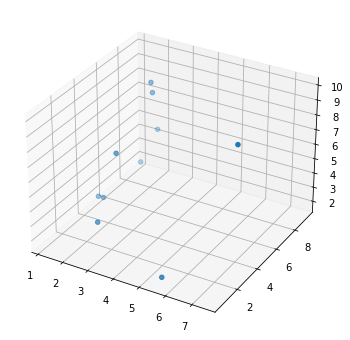

In [221]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs = data["harry_potter"])

The most separated point below is user 3 that we had already mentioned.

# Links

In [222]:
import numpy as np

In [223]:
df = dm2df(dd2, data["user_id"])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [224]:
Z = []

In [225]:
df[11] = df[1]+df[10]
df.loc[11] = df.loc[1]+df.loc[10]
Z.append([1,10, 0.7, 2]) # id1, id2, distance, n_elements_in_cluster
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754,13.263812
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363,19.913834
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671,12.120438
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478,7.062116
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704,9.174066
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226,14.382225
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837,10.155609
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934,6.927114


In [226]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311,0.000000
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478,3.449638
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837,5.047772
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934,3.293934


In [227]:
df = df.drop([1,10])
df = df.drop([1,10], axis = 1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.449638
6,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.047772
9,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934
11,6.578754,9.770363,5.890671,3.449638,4.431704,7.137226,5.047772,3.293934,0.000000


In [228]:
x = 2
y = 7
n = 12

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y, df.loc[x][y], 2]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.000000,8.666026,10.779147,6.004998,10.010494,8.424369,9.770363,7.622336
4,8.666026,0.000000,8.848164,6.476110,9.958414,3.482815,5.890671,10.354709
5,10.779147,8.848164,0.000000,6.113101,2.167948,6.709694,3.449638,5.337602
6,6.004998,6.476110,6.113101,0.000000,5.987487,3.945884,4.431704,4.634652
8,10.010494,9.958414,2.167948,5.987487,0.000000,7.769170,5.047772,3.618011
9,8.424369,3.482815,6.709694,3.945884,7.769170,0.000000,3.293934,8.015610
11,9.770363,5.890671,3.449638,4.431704,5.047772,3.293934,0.000000,6.578754
12,7.622336,10.354709,5.337602,4.634652,3.618011,8.015610,6.578754,0.000000


In [229]:
Z

[[1, 10, 0.7, 2], [2, 7, 0.6164414002968973, 2]]

In [230]:
x = 5
y = 8
n = 13

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y, df.loc[x][y], 2]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.000000,8.666026,6.004998,8.424369,9.770363,7.622336,10.010494
4,8.666026,0.000000,6.476110,3.482815,5.890671,10.354709,8.848164
6,6.004998,6.476110,0.000000,3.945884,4.431704,4.634652,5.987487
9,8.424369,3.482815,3.945884,0.000000,3.293934,8.015610,6.709694
11,9.770363,5.890671,4.431704,3.293934,0.000000,6.578754,3.449638
12,7.622336,10.354709,4.634652,8.015610,6.578754,0.000000,3.618011
13,10.010494,8.848164,5.987487,6.709694,3.449638,3.618011,0.000000


In [231]:
x = 11
y = 13
n = 14

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y, df.loc[x][y], 2]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.000000,8.666026,6.004998,8.424369,7.622336,9.770363
4,8.666026,0.000000,6.476110,3.482815,10.354709,5.890671
6,6.004998,6.476110,0.000000,3.945884,4.634652,4.431704
9,8.424369,3.482815,3.945884,0.000000,8.015610,3.293934
12,7.622336,10.354709,4.634652,8.015610,0.000000,3.618011
14,9.770363,5.890671,4.431704,3.293934,3.618011,0.000000


In [232]:
x = 9
y = 12
z = 14
n = 15

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y,z, df.loc[x][y], 3]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,4,6,15
user_id,,,,
3,0.000000,8.666026,6.004998,7.622336
4,8.666026,0.000000,6.476110,3.482815
6,6.004998,6.476110,0.000000,3.945884
15,7.622336,3.482815,3.945884,0.000000


In [233]:
x = 4
y = 6
z = 15
n = 16

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y,z, df.loc[x][y], 3]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,16
user_id,,
3,0.000000,6.004998
16,6.004998,0.000000


In [234]:
x = 3
y = 16
n = 17

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
Z.append([x,y, df.loc[x][y], 2]) # id1, id2, distance, n_elements_in_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,17
user_id,
17,0.0


In [235]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.6164414002968973, 2],
 [5, 8, 2.16794833886788, 2],
 [11, 13, 3.4496376621320683, 2],
 [9, 12, 14, 8.0156097709407, 3],
 [4, 6, 15, 6.476109943476871, 3],
 [3, 16, 6.0049979184009725, 2]]

The resulting dendrogram is the following

![Alt text](image.png)

Function

In [236]:
def my_linkage(data):
    '''
    Create a Z list that contains: [clusters created in each grouping, distance between them, number of elements]
    '''
    import numpy as np
    Z = []
    np.fill_diagonal(df.values, np.nan) # remove the 0 from the diagonal
    n = len(data)
    
    while len(data) > 1:
        n += 1
        # obtains the (row, column) where the minimum exists
        min_values = np.nanmin(data)
        min_mask = np.isclose(data.values, min_values, atol = 1e-6)
        min_indices = np.argwhere(min_mask)
        unique_pairs = np.array(list({tuple(sorted(pair)) for pair in min_indices}))
        
        # create a new row and column
        data[n] = 0
        data.loc[n] = 0

        # gets the unique values of the combination (row, column)
        columns = np.unique(data.columns.to_numpy()[unique_pairs])

        # create the Z list with all the information
        Z.append(["clusters: " + str(columns), "distance: " + str(min_values), "Number_elements: "+ str(len(columns))])

        # obtain the minimun among the clusters
        for v in data.columns.values.tolist():
            data.loc[n,v] = min([data.loc[i,v] for i in columns])
            data.loc[v,n] = min([data.loc[v,i] for i in columns])

        # remove clusters that are already part of another
        data = data.drop(columns)
        data = data.drop(columns, axis = 1)
        
    return Z

# Hierarchical clustering in Python

In [239]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [243]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [246]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


## Using ward link method

In [248]:
Z = linkage(data[movies], "ward")
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

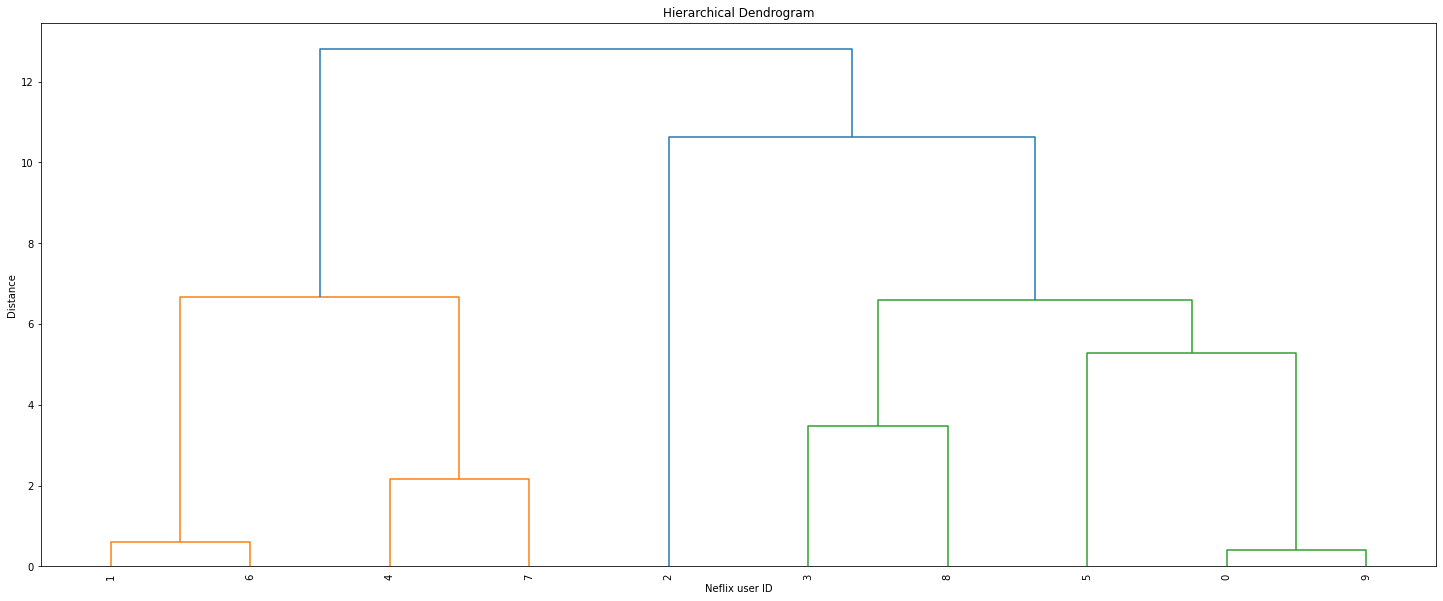

In [250]:
plt.figure(figsize = (25,10))
plt.title("Hierarchical Dendrogram")
plt.xlabel("Neflix user ID")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

## Using average link method

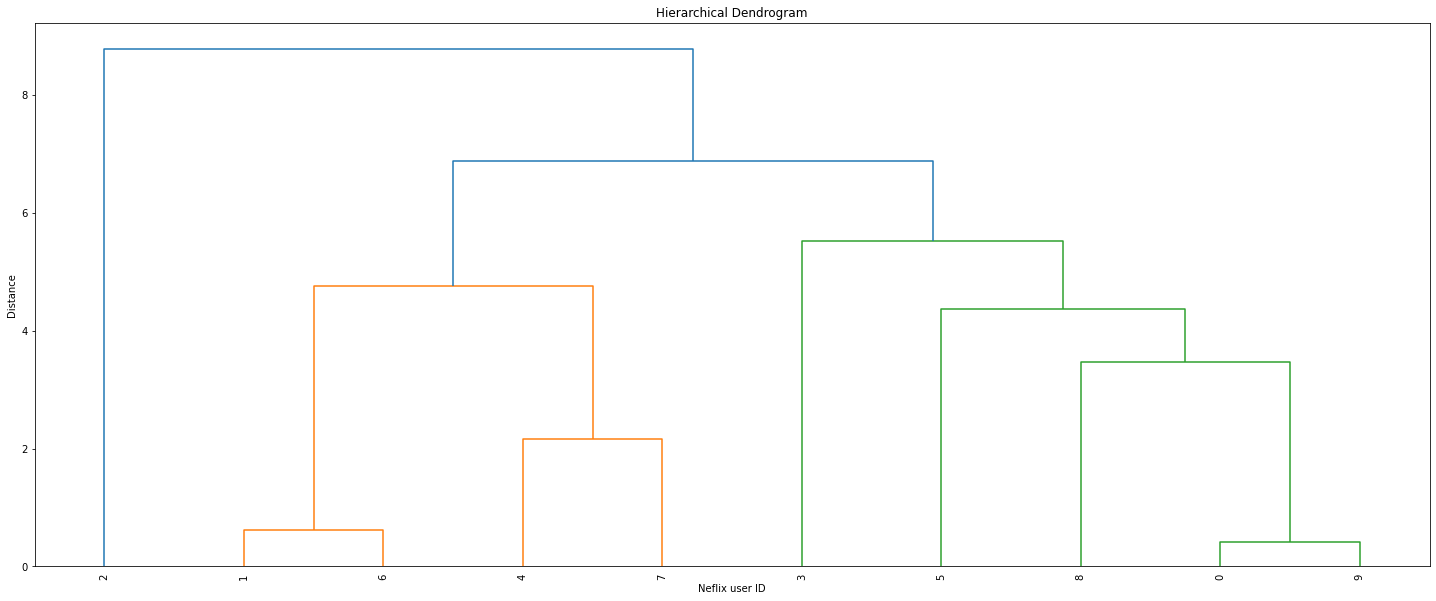

In [251]:
Z = linkage(data[movies], "average")
plt.figure(figsize = (25,10))
plt.title("Hierarchical Dendrogram")
plt.xlabel("Neflix user ID")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

We see that clusters 1 and 6 are similar and clusters 0 and 9 as well. We can observe this aspect in tha dataset, they present similar values between them.

In [252]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


## Using single link method

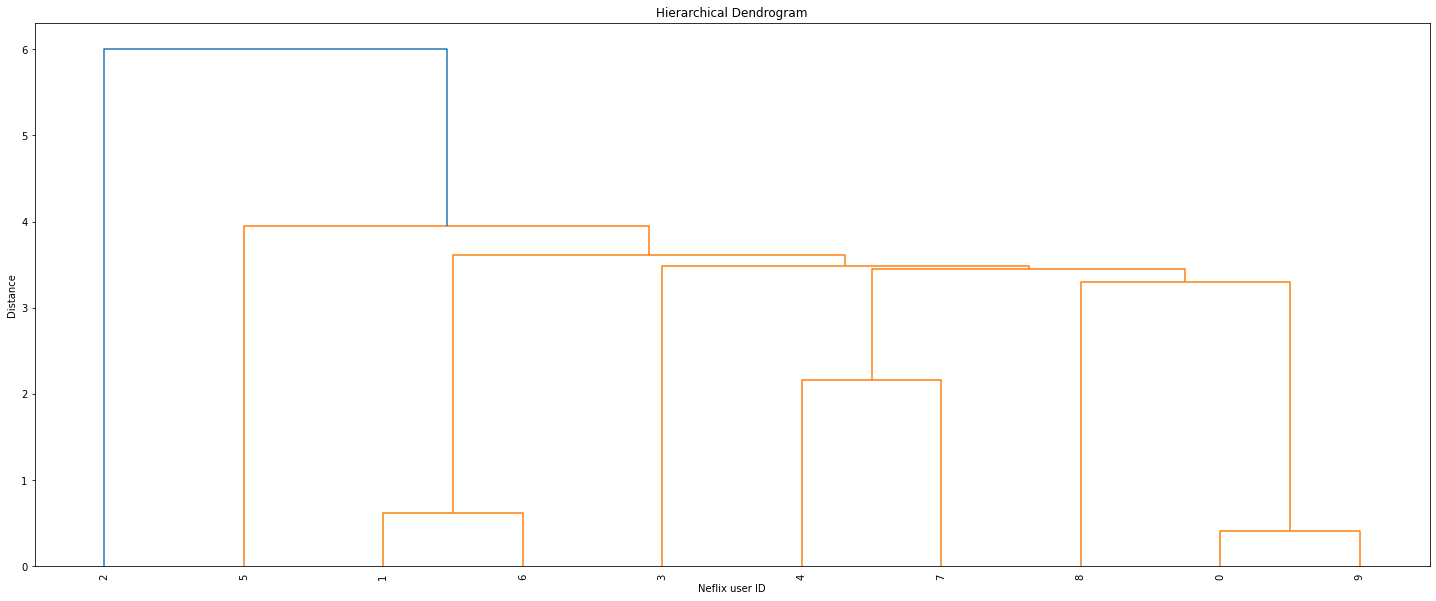

In [255]:
Z = linkage(data[movies], "single", metric = "euclidean") # metric = "euclidean", "chebyshev", "cityblock", "hamming", ... 
plt.figure(figsize = (25,10))
plt.title("Hierarchical Dendrogram")
plt.xlabel("Neflix user ID")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()